In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#harga daging sapi
df = pd.DataFrame({
    'berat' : [10,20,30,40,50],
    'harga' : [1200000, 2000000, 2800000, 3500000, 4000000]
})
df

,berat,harga
0,10,1200000
1,20,2000000
2,30,2800000
3,40,3500000
4,50,4000000


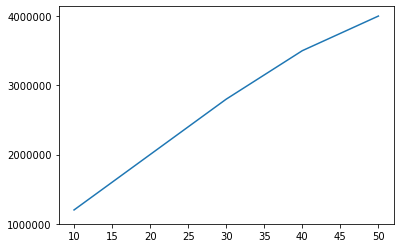

In [4]:
plt.plot(df['berat'], df['harga'])
plt.yticks(np.arange(1000000, 5000000, 1000000), ['1000000', '2000000', '3000000', '4000000', '5000000'])
plt.show()

-1 korelasi kuat, tapi negative (berbanding terbalik)
0 tdk ada korelasi
1 korelasi kuat & positive (berbanding lurus)

In [5]:
df.corr()

,berat,harga
berat,1.000000,0.996154
harga,0.996154,1.000000


### _Method Correlation_
#### pearson  $\displaystyle r$ (pearson is corr default)
#### spearman $\displaystyle \rho$ / $r_{s}$
#### kendall $\displaystyle \tau$

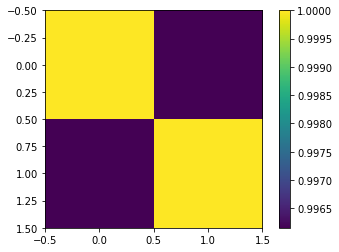

In [8]:
plt.imshow(df.corr())
plt.colorbar()

## _Pearson Correlation Coefficient $r$_

$$\displaystyle r = \frac {n(\sum{xy}) - (\sum{x})(\sum{y})}
{\sqrt{ (n \sum{x^2} - (\sum{x})^2) ((n \sum{y^2} - (\sum{y})^2 }}$$

### Pearson with Pandas

In [8]:
df = pd.DataFrame({
    'mesin (x)': [1000,2000,3000,4000,5000],
    'harga (y)': [10,25,35,55,80]
})
df.corr(method='pearson')

,mesin (x),harga (y)
mesin (x),1.00000,0.98644
harga (y),0.98644,1.00000


### Pearson without Pandas

In [14]:
df = pd.DataFrame({
    'mesin (x)': [1000,2000,3000,4000,5000],
    'harga (y)': [10,25,35,55,80]
})
df['xy'] = df['mesin (x)'] * df['harga (y)']
df['x2'] = df['mesin (x)'] ** 2
df['y2'] = df['harga (y)'] ** 2

n = len(df)
sumX = df['mesin (x)'].sum()
sumY = df['harga (y)'].sum()
sumXY = df['xy'].sum()
sumX2 = df['x2'].sum()
sumY2 = df['y2'].sum()
df

,mesin (x),harga (y),xy,x2,y2
0,1000,10,10000,1000000,100
1,2000,25,50000,4000000,625
2,3000,35,105000,9000000,1225
3,4000,55,220000,16000000,3025
4,5000,80,400000,25000000,6400


In [15]:
r = ( ( n*sumXY) - (sumX*sumY) ) / ( ( (n*sumX2 - sumX ** 2) * (n*sumY2 - sumY ** 2) ) ** .5)
r

0.9864400504156211

## _Spearman $\rho$_
#### if there's data with the same rank / 'tied rank'
$$\rho = \frac {\sum (x - \bar{x} (y - \bar{y})} {\sqrt {(x - \bar{x}) ^ 2 (y - \bar{y}) ^ 2}}$$

#### if there's no data with the 'tied rank'
$$\rho = 1 - \frac {6 \sum {d^2}} {n(n^2 - 1)}$$

### Spearman with Pandas

In [16]:
df = pd.DataFrame({
    'Math' : [56,75,45,71,62,64,58,80,76,61],
    "Physics" : [66,70,40,60,65,56,59,77,67,63]
})
df.corr(method='spearman')

,Math,Physics
Math,1.000000,0.672727
Physics,0.672727,1.000000


### Spearman without Pandas

In [18]:
df = pd.DataFrame({
    'Math' : [56,75,45,71,62,64,58,80,76,61],
    "Physics" : [66,70,40,60,65,56,59,77,67,63]
})
df = df.sort_values(by='Math', ascending=False)
df['Rank Math'] = np.arange(1, 11)
df = df.sort_values(by='Physics', ascending=False)
df['Rank Physics'] = np.arange(1, 11)
df = df.sort_index()
df['d'] = df['Rank Math'] - df['Rank Physics']
df['d2'] = df['d'] ** 2

sumd2 = df['d2'].sum()
n = len(df)
rho = 1 - ((6 * sumd2) / (n * (n**2 - 1)))
rho

0.6727272727272727

## _Kendall $\displaystyle \tau$_

### Kendall with Pandas

In [29]:
df = pd.DataFrame({
    'Math' : [56,75,45,71,62,64,58,80,76,61],
    "Physics" : [66,70,40,60,65,56,59,77,67,63]
})
df = df.sort_values(by='Math', ascending=False)
df['Rank Math'] = np.arange(1, 11)
df = df.sort_values(by='Physics', ascending=False)
df['Rank Physics'] = np.arange(1, 11)
df = df.sort_index()
df[['Math', 'Physics']].corr(method='kendall')

,Math,Physics
Math,1.000000,0.511111
Physics,0.511111,1.000000


In [22]:
df = df[['Math', 'Physics', 'Rank Math', 'Rank Physics']].copy()
df = df.sort_values(by=['Rank Math', 'Rank Physics'], ascending=True)
df['concordant'] = np.array([9,7,7,3,1,3,2,1,1,0])
df['discordant'] = np.array([0,1,0,3,4,1,1,1,0,0])

In [24]:
# (sum C - sum D) / (sum C + sum D)
sumC = df['concordant'].sum()
sumD = df['discordant'].sum()
(sumC - sumD) / (sumC + sumD)

0.5111111111111111